In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from HelperFunctions import *
from PtOccupancyFunctions import *
import scipy.integrate
import scipy.linalg
from pprint import pprint
from FindDataFunctions import *
from scipy.signal import savgol_filter
import func
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter


size = 384/(2*72.27)

In [30]:
train_capacity = 100
e_train = 9.47#/train_capacity
e_car = 2.47
e_drt = 3.28
v_drt = 30*5/18 #m/s
system_size = 20000 #m
train_freq = 1/600 # per sec

access_dict_1K = {"reqs":"1000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"10000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 10000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_10K = {"reqs":"10000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"10000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 10000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_10K_periodic = {"reqs":"10000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"10000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 10000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/bimodal/",
                    }


access_dict_30K = {"reqs":"30000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"100000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 10000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_100K = {"reqs":"100000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"100000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 10000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_100K_periodic = {"reqs":"100000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"100000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 10000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/periodic/scenarios/fine_grid/bimodal/",
                    }


access_dict_100K_20L_40l = {"reqs":"100000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"100000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"4000",
                     "system_size": 20000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/high_speed_frequency/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/high_speed_frequency/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/high_speed_frequency/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/high_speed_frequency/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_100K_20L_20l = {"reqs":"100000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"100000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 20000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_100K_20L_5l = {"reqs":"100000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"100000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"500",
                     "system_size": 20000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/out_1E5_2hr_5l",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/out_1E5_2hr_5l",
                    }

access_dict_100K_20L_10l = {"reqs":"100000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"100000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"1000",
                     "system_size": 20000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/out_1E5_2hr_10l",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/out_1E5_2hr_10l",
                    }


access_dict_10K_20L_20l = {"reqs":"10000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"10000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 20000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_1K_20L_20l = {"reqs":"1000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"10000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 20000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/",
                    }

access_dict_1K_20L_20l_low_rejection = {"reqs":"1000",
                     "dist":"4000",
                     "frac_comm_orig_dest":"0",
                     "drt":"10000",
                     "dcut":None,
                     "small_railInterval":None,
                     "l":"2000",
                     "system_size": 20000,
                     "freespeed_car": 30*5/18,
                     "train_freq": 1/600,
                     "path_pkl":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/out_1E3_2hr_20l_low_rejection",
                     "path_uni":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/unimodal/",
                     "path_car":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/car/",
                     "path_bim":"/project.dcf/poss/projects/bimodal/raw/psharma/cluster_runs_2_hr/20_L/aperiodic/scenarios/fine_grid/bimodal/out_1E3_2hr_20l_low_rejection",
                    }

In [31]:

bim_keys = ["reqs", "dist", "frac_comm_orig_dest", "drt","dcut", "small_railInterval", "l"] # keys for path to directory
# --- Normal ---#

def get_all_dirs(access_dict,bim_keys):
    d = access_dict
    reqs = d["reqs"]
    drt = d["drt"]
    l = d["l"]
    system_size = d["system_size"]
    freespeedcar = d["freespeed_car"]
    train_freq = d["train_freq"]
    path_pkl = d["path_pkl"]
    bim_dirs = getDirs(d["path_bim"], bim_keys, [d["reqs"], d["dist"], d["frac_comm_orig_dest"], d["drt"], d["dcut"], d["small_railInterval"], d["l"]])
    uni_dir = getDirs(d["path_uni"], ["reqs","dist","frac_comm_orig_dest","drt","unimodal"], [d["reqs"],d["dist"],d["frac_comm_orig_dest"],d["drt"], None])[0][-1]
    car_dir = getDirs(d["path_car"], ["reqs","dist","car"], [d["reqs"],d["dist"],None])[0][-1]
        
    dirs = {"bim_dirs":bim_dirs,
           "uni_dir":uni_dir,
           "car_dir":car_dir,
            "reqs":reqs,
            "path_pkl":path_pkl,
            "drt":drt,
            "l":l,
            "system_size": system_size,
            "freespeedcar": freespeedcar,
            "train_freq": train_freq,
           }
    
    return dirs


In [79]:
def create_pkl(dirs,periodic):
    car_dir = dirs["car_dir"]
    uni_dir = dirs["uni_dir"]
    bim_dirs = dirs["bim_dirs"]
    path_pkl = dirs["path_pkl"]
    reqs = dirs["reqs"]
    drt = dirs["drt"]
    l = dirs["l"]
    system_size = dirs["system_size"]
    freespeedcar = dirs["freespeedcar"]
    train_freq = dirs["train_freq"]
    
    #print(reqs)
    
    car_unsuccess_idx = getTripSuccess(car_dir)["tripSuccess"] # directory by name trip_success.csv records successful trips
    car_unsuccess_idx = car_unsuccess_idx[~car_unsuccess_idx].index
    trips_car = getTrips(car_dir, "car").drop(car_unsuccess_idx, errors='ignore')
    dists_car = trips_car["traveled_distance"]
    cummulative_car = dists_car.sum()
    tt_car = trips_car["trav_time"].mean()
    
    #get persons
    df_persons = getPersons(car_dir,periodic)
    true_mean_req_dist = df_persons["mean_dist"].mean()
    
    #sim_dict is main data container throughout for the simulation parameters
    sim_dict = {"reqs":reqs,
               "drt":drt,
               "l":l,
                "system_size":system_size,
                "freespeedcar":freespeedcar,
                "train_freq":train_freq,
                "true_mean_req_dist":true_mean_req_dist,
                }
    
    car_dict = {"cummulative_car": cummulative_car,
               "tt_car": tt_car,
               }
    
    
    
    #Unimodal--------------------
    
    
    trips_unimodal = getTrips(uni_dir, "unimodal").drop(car_unsuccess_idx, axis=0, errors='ignore')
    #trips_unimodal.drop(car_unsuccess_idx, axis=0, errors='ignore')
    tt_unimodal = trips_unimodal["trav_time"].mean()
    
    #dists_car_for_rejected_uni = dists_car.loc[trip_succ_uni[~trip_succ_uni["tripSuccess"]].index.to_numpy()]
    
    #change argument to "occupiedDistance_m" or "drivenDistance_m" depending on what you want also in FindDataFunctions -> getDrtVehicleDistances
    dists_unimodal = pd.read_csv(uni_dir["drt_dists"],sep=";")["drivenDistance_m"]
    
    
    uni_drt_detour = pd.read_csv(uni_dir["drt_detours"], sep=";").loc[:, ["person", "distanceDetour", "unsharedTime"]]["distanceDetour"].mean()
    cummulative_unimodal = dists_unimodal.sum()
    uni_drt_occupancy,uni_drt_standing_fraction = getDrtOccupandyAndStandingFrac(uni_dir,False)
    traffic_unimodal = int(drt)*(1-uni_drt_standing_fraction)
    wait_time_unimodal = trips_unimodal["wait_time"].mean()
    
    uni_dict = {"tt_unimodal": tt_unimodal,
               "dists_unimodal": dists_unimodal,
               "cummulative_unimodal": cummulative_unimodal,
               "uni_drt_occupancy":uni_drt_occupancy,
                "uni_drt_detour":uni_drt_detour,
               "traffic_unimodal":traffic_unimodal,
               "wait_time_unimodal": wait_time_unimodal,
               }
    # ride_time_unimodal = (trips_unimodal["trav_time"] - trips_unimodal["wait_time"]).mean()

    saved_path = os.path.join(path_pkl,reqs+"saved.pkl")
    # Do we need individual statistics ? If yes, create a seperate function don't do it here it is already very cluttered
        
    
    if os.path.isfile(saved_path):
        df = pd.read_pickle(saved_path)
    else:
        cols = bim_keys + ["cummulative_drt_bimodal","cummulative_train_bimodal","cummulative_car_bimodal",
                "av_drt_occs","av_drt_occs_non_empty","av_drt_occs_non_standing","wait_times",
                "wait_times_served_only","wait_times_drt_unimodal_legs","ride_times_drt_unimodal_legs",
                "wait_times_drt_bimodal_legs","serviced_fracts","av_pt_occs","av_detours","drt_wait_times",
                "pt_wait_times","tt_ratios_beyond_lcut","tt_bimodal","drt_rt","standing_fraction",
                "ph_drt_travel", "ph_drt_wait", "ph_pt_travel", "ph_pt_wait", "ph_walk_travel","pkm_drt",
                "pkm_pt", "pkm_walk", "pt_usage_count", "non_pt_usage_count",
                "effective_passenger_number", "drt_mean_dist", "cummulative_drt_unshared", "drt_wait_times_std", "bimodal_fraction", "tt_bimodal_served_only"]
        
        ph_columns_df = ["ph_drt_travel", "ph_drt_wait", "ph_pt_travel", "ph_pt_wait", "ph_walk_travel"]
        pkm_columns_df = ["pkm_drt", "pkm_pt", "pkm_walk"]
        ph_columns = ["drt_travel", "drt_wait", "pt_travel", "pt_wait", "walk_travel"]
        pkm_columns = ["drt", "pt", "walk"]
        fraction_columns = ["drt","pt"]
        
        print(cols)
        print(len(cols))

    #     idx = np.array([bim_dir[:-1] for bim_dir in bim_dirs], dtype=np.int64)
    #     multi_idx = pd.MultiIndex.from_arrays(idx.T, names=bim_keys)
        df = pd.DataFrame(np.full((len(bim_dirs), len(cols)),np.nan), columns=cols)

        for i,entry in enumerate(bim_dirs[:]):
            df_entry = df.iloc[i]
            try:
                # drt/pt_person_km can be get easier
                #dcut = entry[]
                print(*entry[:-1])
        #         df_entry = df.loc[tuple(e for e in entry[:-1]),:]
                for ii,key in enumerate(bim_keys):
                    df_entry[key] = entry[ii] 
                dic = entry[-1]
                #print(dic)
                trips = getTrips(dic, "bimodal").drop(car_unsuccess_idx, errors='ignore')
                drt_trips ,drt_trips_perperson = getDrtTrips(dic)
                drt_trips_perperson.drop(car_unsuccess_idx, errors='ignore', inplace=True)
                drt_trips.drop(car_unsuccess_idx, errors='ignore', inplace=True)
                drt_veh_dists = getDrtVehicleDistances(dic)
                trip_succ = getTripSuccess(dic).drop(car_unsuccess_idx, errors='ignore')
                df_entry.loc["av_drt_occs_non_standing"], df_entry.loc["standing_fraction"] = getDrtOccupandyAndStandingFrac(dic, False)
                df_entry.loc["av_drt_occs_non_empty"], _ = getDrtOccupandyAndStandingFrac(dic, True)
                df_entry.loc["av_drt_occs"], _ = getDrtOccupandyAndStandingFrac(dic, False, True)
                df_entry.loc["av_pt_occs"] = getPtOccupancy(dic)
                # Modify time detour with unshared ride time
                drt_detours = getDrtDetours(dic)["distanceDetour"]
                pt_dist = getCummulativePtDistance(dic)
                df_entry.loc[ph_columns_df], df_entry.loc[pkm_columns_df] = getModeStats(dic, ph_columns, pkm_columns)

        #         df_entry.loc["drt_personkm"] = drt_trips_perperson["travelDistance_m"].sum()
        #         df_entry.loc["pt_personkm"] = trips["traveled_distance"].sum()-df_entry.loc["drt_personkm"]
                df_entry.loc["drt_rt"] = drt_trips["travelTime"].mean()
                df_entry.loc["drt_mean_dist"] = drt_trips["travelDistance_m"].mean()
                df_entry.loc["cummulative_drt_unshared"] = drt_trips["direcTravelDistance_m"].sum()
                serviced_fracts = len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ)
                df_entry.loc["serviced_fracts"] = len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ)
                print("Servability: ", df_entry.loc["serviced_fracts"])
                dists_car_for_rejected = dists_car.loc[
                    trip_succ[~trip_succ["tripSuccess"]].index.to_numpy()
                ]
                df_entry.loc["cummulative_drt_bimodal"] = drt_veh_dists.sum()
                df_entry.loc["cummulative_car_bimodal"] = dists_car_for_rejected.sum()
                df_entry.loc["cummulative_train_bimodal"] = pt_dist
                pt_in_trips = trips["modes"].str.contains("pt")
                pt_in_trips_idx = pt_in_trips[pt_in_trips].index
                pt_not_in_trips_idx = pt_in_trips[~pt_in_trips].index
                count_pt_in_trips = pt_in_trips.value_counts()
                df_entry.loc["pt_usage_count"] = count_pt_in_trips[True]
                df_entry.loc["non_pt_usage_count"] = count_pt_in_trips[False]

                df_entry.loc["av_detours"] = drt_detours.mean()
                df_entry.loc["tt_bimodal"] = trips["trav_time"].mean()
                df_entry.loc["wait_times"] = trips["wait_time"].mean()

                idx_served = trip_succ[trip_succ["tripSuccess"]].index
                df_entry.loc["wait_times_served_only"] = trips.loc[idx_served, "wait_time"].mean()
                df_entry.loc["tt_bimodal_served_only"] = trips.loc[idx_served, "trav_time"].mean()

    #             df_entry.loc["drt_wait_times"] = drt_trips_perperson["waitTime"].mean()
                df_entry.loc["drt_wait_times"] = drt_trips_perperson["waitTime"].mean()
                df_entry.loc["drt_wait_times_std"] = drt_trips_perperson["waitTime"].std()
                df_entry.loc["wait_times_drt_unimodal_legs"] = drt_trips_perperson.drop(pt_in_trips_idx, errors='ignore')["waitTime"].mean()
                df_entry.loc["wait_times_drt_bimodal_legs"] = drt_trips_perperson.drop(pt_not_in_trips_idx, errors='ignore')["waitTime"].mean()
                df_entry.loc["ride_times_drt_unimodal_legs"] = drt_trips_perperson.drop(pt_not_in_trips_idx, errors='ignore')["travelTime"].mean()
                pt_wait_series = (trips["wait_time"] - drt_trips_perperson["waitTime"]).fillna(0)
                df_entry.loc["pt_wait_times"] = pt_wait_series[pt_wait_series !=0].mean()
                idx_pt_in_trips = pt_in_trips[pt_in_trips].index
                df_persons = getPersons(dic,periodic)
                
                # Find bimodal fraction
                #print(df_entry.loc["dcut"])
                #print(df_persons["mean_dist"].max())
                unimodal_fraction,bimodal_fraction = count_pt_in_trips[False]/len(trip_succ[trip_succ["tripSuccess"]]),count_pt_in_trips[True]/len(trip_succ[trip_succ["tripSuccess"]])
                #bimodal_fraction = len(df_persons[df_persons["mean_dist"]>df_entry.loc["dcut"]])/len(df_persons)
                df_entry.loc["bimodal_fraction"] = bimodal_fraction
                print("bimodal_fraction:", df_entry.loc["bimodal_fraction"])
                print("unimodal+bimodal fraction:", unimodal_fraction + bimodal_fraction)

                df_entry.loc["effective_passenger_number"] = len(df_persons)
        #         df_entry.loc["tt_ratios_beyond_lcut"] = trips["trav_time"][idx_pt_in_trips].sum()/trips_car["trav_time"][idx_pt_in_trips].sum()
                print("-----")
            except KeyError:
                df_entry.loc[:] = np.nan
        df.to_pickle(saved_path)
        
    return df,car_dict,uni_dict,sim_dict


### Drop unsuccessful trips

In [80]:
def create_pkl_drop_unsuccessful(dirs,periodic):
    car_dir = dirs["car_dir"]
    uni_dir = dirs["uni_dir"]
    bim_dirs = dirs["bim_dirs"]
    path_pkl = dirs["path_pkl"]
    reqs = dirs["reqs"]
    drt = dirs["drt"]
    l = dirs["l"]
    system_size = dirs["system_size"]
    freespeedcar = dirs["freespeedcar"]
    train_freq = dirs["train_freq"]
    
    #print(reqs)
    
    car_unsuccess_idx = getTripSuccess(car_dir)["tripSuccess"] # directory by name trip_success.csv records successful trips
    car_unsuccess_idx = car_unsuccess_idx[~car_unsuccess_idx].index
    trips_car = getTrips(car_dir, "car").drop(car_unsuccess_idx, errors='ignore')
    dists_car = trips_car["traveled_distance"]
    cummulative_car = dists_car.sum()
    tt_car = trips_car["trav_time"].mean()
    
    #get persons
    df_persons = getPersons(car_dir,periodic)
    true_mean_req_dist = df_persons["mean_dist"].mean()
    
    #sim_dict is main data container throughout for the simulation parameters
    sim_dict = {"reqs":reqs,
               "drt":drt,
               "l":l,
                "system_size":system_size,
                "freespeedcar":freespeedcar,
                "train_freq":train_freq,
                "true_mean_req_dist":true_mean_req_dist,
                }
    
    car_dict = {"cummulative_car": cummulative_car,
               "tt_car": tt_car,
               }
    
    
    
    #Unimodal--------------------
    uni_unsuccess_idx = getTripSuccess(uni_dir)["tripSuccess"] # directory by name trip_success.csv records successful trips
    uni_unsuccess_idx = uni_unsuccess_idx[~uni_unsuccess_idx].index    
    trips_unimodal = getTrips(uni_dir, "unimodal").drop(uni_unsuccess_idx, errors='ignore')
    equiv_car_trips = getTrips(car_dir, "car").drop(uni_unsuccess_idx, errors='ignore')
    #change argument to "occupiedDistance_m" or "drivenDistance_m" depending on what you want also in FindDataFunctions -> getDrtVehicleDistances
    dists_unimodal = pd.read_csv(uni_dir["drt_dists"],sep=";")["drivenDistance_m"]
    tt_unimodal = trips_unimodal["trav_time"].mean()
    equiv_mean_req_dist = equiv_car_trips["traveled_distance"].mean() # D for successful trips only
    equiv_mean_travel_time = equiv_car_trips["trav_time"].mean()    # t_0 for successful trips only
    
    #dists_car_for_rejected_uni = dists_car.loc[trip_succ_uni[~trip_succ_uni["tripSuccess"]].index.to_numpy()]
    uni_drt_detour = pd.read_csv(uni_dir["drt_detours"], sep=";").loc[:, ["person", "distanceDetour", "unsharedTime"]]["distanceDetour"].mean()
    cummulative_unimodal = dists_unimodal.sum()
    uni_drt_occupancy,uni_drt_standing_fraction = getDrtOccupandyAndStandingFrac(uni_dir,False)
    traffic_unimodal = int(drt)*(1-uni_drt_standing_fraction)
    wait_time_unimodal = trips_unimodal["wait_time"].mean()
    
    uni_dict = {"tt_unimodal": tt_unimodal,
               "dists_unimodal": dists_unimodal,
               "cummulative_unimodal": cummulative_unimodal,
               "uni_drt_occupancy":uni_drt_occupancy,
                "uni_drt_detour":uni_drt_detour,
               "traffic_unimodal":traffic_unimodal,
               "wait_time_unimodal": wait_time_unimodal,
                "equiv_mean_req_dist": equiv_mean_req_dist,
                "equiv_mean_travel_time": equiv_mean_travel_time,
               }
    # ride_time_unimodal = (trips_unimodal["trav_time"] - trips_unimodal["wait_time"]).mean()

    saved_path = os.path.join(path_pkl,reqs+"saved_drop_unsuccessful.pkl")
    # Do we need individual statistics ? If yes, create a seperate function don't do it here it is already very cluttered
        
    
    if os.path.isfile(saved_path):
        df = pd.read_pickle(saved_path)
    else:
        cols = bim_keys + ["cummulative_drt_bimodal","cummulative_train_bimodal","cummulative_car_bimodal",
                "av_drt_occs","av_drt_occs_non_empty","av_drt_occs_non_standing","wait_times",
                "wait_times_served_only","wait_times_drt_unimodal_legs","ride_times_drt_unimodal_legs",
                "wait_times_drt_bimodal_legs","serviced_fracts","av_pt_occs","av_detours","drt_wait_times",
                "pt_wait_times","tt_ratios_beyond_lcut","tt_bimodal","drt_rt","standing_fraction",
                "ph_drt_travel", "ph_drt_wait", "ph_pt_travel", "ph_pt_wait", "ph_walk_travel","pkm_drt",
                "pkm_pt", "pkm_walk", "pt_usage_count", "non_pt_usage_count",
                "effective_passenger_number", "drt_mean_dist", "cummulative_drt_unshared", "drt_wait_times_std", "bimodal_fraction",
                "equiv_mean_req_dist","equiv_mean_travel_time"]
        
        ph_columns_df = ["ph_drt_travel", "ph_drt_wait", "ph_pt_travel", "ph_pt_wait", "ph_walk_travel"]
        pkm_columns_df = ["pkm_drt", "pkm_pt", "pkm_walk"]
        ph_columns = ["drt_travel", "drt_wait", "pt_travel", "pt_wait", "walk_travel"]
        pkm_columns = ["drt", "pt", "walk"]
        fraction_columns = ["drt","pt"]
        
        print(cols)
        print(len(cols))

    #     idx = np.array([bim_dir[:-1] for bim_dir in bim_dirs], dtype=np.int64)
    #     multi_idx = pd.MultiIndex.from_arrays(idx.T, names=bim_keys)
        df = pd.DataFrame(np.full((len(bim_dirs), len(cols)),np.nan), columns=cols)

        for i,entry in enumerate(bim_dirs[:]):
            df_entry = df.iloc[i]
            try:
                # drt/pt_person_km can be get easier
                #dcut = entry[]
                print(*entry[:-1])
        #         df_entry = df.loc[tuple(e for e in entry[:-1]),:]
                for ii,key in enumerate(bim_keys):
                    df_entry[key] = entry[ii] 
                dic = entry[-1]
                #print(dic)
                
                #get unsucessful bi-modal trips
                bim_unsuccess_idx = getTripSuccess(dic)["tripSuccess"] # directory by name trip_success.csv records successful trips
                bim_unsuccess_idx = bim_unsuccess_idx[~bim_unsuccess_idx].index
                trips = getTrips(dic, "bimodal").drop(bim_unsuccess_idx, errors='ignore')
                drt_trips ,drt_trips_perperson = getDrtTrips(dic)
                drt_trips_perperson.drop(bim_unsuccess_idx, errors='ignore', inplace=True)
                drt_trips.drop(bim_unsuccess_idx, errors='ignore', inplace=True)
                drt_veh_dists = getDrtVehicleDistances(dic)
                
                equiv_car_trips = getTrips(car_dir, "car").drop(bim_unsuccess_idx, errors='ignore')
                equiv_mean_req_dist = equiv_car_trips["traveled_distance"].mean() # D for successful trips only
                equiv_mean_travel_time = equiv_car_trips["trav_time"].mean()    # t_0 for successful trips only
                
                df_entry.loc["equiv_mean_req_dist"] = equiv_mean_req_dist
                df_entry.loc["equiv_mean_travel_time"] = equiv_mean_travel_time
                
                
                #to compute fraction of sucessuful trips, only drop car_unsuccess_idx
                trip_succ = getTripSuccess(dic).drop(car_unsuccess_idx, errors='ignore')
                
                #bimodal sucessful trips
                trip_succ_bim = getTripSuccess(dic).drop(bim_unsuccess_idx, errors='ignore')
                
                df_entry.loc["av_drt_occs_non_standing"], df_entry.loc["standing_fraction"] = getDrtOccupandyAndStandingFrac(dic, False)
                df_entry.loc["av_drt_occs_non_empty"], _ = getDrtOccupandyAndStandingFrac(dic, True)
                df_entry.loc["av_drt_occs"], _ = getDrtOccupandyAndStandingFrac(dic, False, True)
                df_entry.loc["av_pt_occs"] = getPtOccupancy(dic)
                # Modify time detour with unshared ride time
                drt_detours = getDrtDetours(dic)["distanceDetour"]
                pt_dist = getCummulativePtDistance(dic)
                df_entry.loc[ph_columns_df], df_entry.loc[pkm_columns_df] = getModeStats(dic, ph_columns, pkm_columns)

        #         df_entry.loc["drt_personkm"] = drt_trips_perperson["travelDistance_m"].sum()
        #         df_entry.loc["pt_personkm"] = trips["traveled_distance"].sum()-df_entry.loc["drt_personkm"]
                df_entry.loc["drt_rt"] = drt_trips["travelTime"].mean()
                df_entry.loc["drt_mean_dist"] = drt_trips["travelDistance_m"].mean()
                df_entry.loc["cummulative_drt_unshared"] = drt_trips["direcTravelDistance_m"].sum()
                serviced_fracts = len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ)
                df_entry.loc["serviced_fracts"] = serviced_fracts
                print("Servability: ", df_entry.loc["serviced_fracts"])
                dists_car_for_rejected = dists_car.loc[
                    trip_succ[~trip_succ["tripSuccess"]].index.to_numpy()
                ]
                df_entry.loc["cummulative_drt_bimodal"] = drt_veh_dists.sum()
                df_entry.loc["cummulative_car_bimodal"] = dists_car_for_rejected.sum()
                df_entry.loc["cummulative_train_bimodal"] = pt_dist
                pt_in_trips = trips["modes"].str.contains("pt")
                pt_in_trips_idx = pt_in_trips[pt_in_trips].index
                pt_not_in_trips_idx = pt_in_trips[~pt_in_trips].index
                count_pt_in_trips = pt_in_trips.value_counts()
                df_entry.loc["pt_usage_count"] = count_pt_in_trips[True]
                df_entry.loc["non_pt_usage_count"] = count_pt_in_trips[False]

                df_entry.loc["av_detours"] = drt_detours.mean()
                df_entry.loc["tt_bimodal"] = trips["trav_time"].mean()
                df_entry.loc["wait_times"] = trips["wait_time"].mean()

                idx_served = trip_succ_bim[trip_succ_bim["tripSuccess"]].index
                df_entry.loc["wait_times_served_only"] = trips.loc[idx_served, "wait_time"].mean()

    #             df_entry.loc["drt_wait_times"] = drt_trips_perperson["waitTime"].mean()
                df_entry.loc["drt_wait_times"] = drt_trips_perperson["waitTime"].mean()
                df_entry.loc["drt_wait_times_std"] = drt_trips_perperson["waitTime"].std()
                df_entry.loc["wait_times_drt_unimodal_legs"] = drt_trips_perperson.drop(pt_in_trips_idx, errors='ignore')["waitTime"].mean()
                df_entry.loc["wait_times_drt_bimodal_legs"] = drt_trips_perperson.drop(pt_not_in_trips_idx, errors='ignore')["waitTime"].mean()
                df_entry.loc["ride_times_drt_unimodal_legs"] = drt_trips_perperson.drop(pt_not_in_trips_idx, errors='ignore')["travelTime"].mean()
                pt_wait_series = (trips["wait_time"] - drt_trips_perperson["waitTime"]).fillna(0)
                df_entry.loc["pt_wait_times"] = pt_wait_series[pt_wait_series !=0].mean()
                idx_pt_in_trips = pt_in_trips[pt_in_trips].index
                df_persons = getPersons(dic,periodic)
                
                # Find bimodal fraction
                #print(df_entry.loc["dcut"])
                #print(df_persons["mean_dist"].max())
                unimodal_fraction,bimodal_fraction = count_pt_in_trips[False]/len(trip_succ_bim[trip_succ_bim["tripSuccess"]]),count_pt_in_trips[True]/len(trip_succ_bim[trip_succ_bim["tripSuccess"]])
                #bimodal_fraction = len(df_persons[df_persons["mean_dist"]>df_entry.loc["dcut"]])/len(df_persons)
                df_entry.loc["bimodal_fraction"] = bimodal_fraction
                print("bimodal_fraction:", df_entry.loc["bimodal_fraction"])
                print("unimodal+bimodal fraction:", unimodal_fraction + bimodal_fraction)

                df_entry.loc["effective_passenger_number"] = len(df_persons)
        #         df_entry.loc["tt_ratios_beyond_lcut"] = trips["trav_time"][idx_pt_in_trips].sum()/trips_car["trav_time"][idx_pt_in_trips].sum()
                print("-----")
            except KeyError:
                df_entry.loc[:] = np.nan
        df.to_pickle(saved_path)
        
    return df,car_dict,uni_dict,sim_dict

#dirs = get_all_dirs(access_dict_1K_20L_20l,bim_keys)
#create_pkl_drop_unsucessful(dirs,periodic=False)

### Sort data, non-dimentionalize, and mean_req_dist

In [81]:
def sort_df(df,sim_dict,drop_unsuccessful):
    mean_req_dist = sim_dict["true_mean_req_dist"]
    
    df = df.sort_values(bim_keys)
    df["l"] /= mean_req_dist
    df["dcut"] /= mean_req_dist
    df = df.sort_values("dcut")
    return df,sim_dict

### Theoretical predictions

In [82]:

def get_traffic(ell,dc,Fbi,Funi,dldcFuni,dgdcFbi,E):
    eta = E**func.c
    Dshuttle = (2*func.beta*ell*Fbi + dldcFuni)/(2-Fbi)
    return Dshuttle*(1+Fbi)/eta

get_trafficVectorized = np.vectorize(get_traffic)
    

def get_params(sim_dict):
    reqs = sim_dict["reqs"]
    mean_req_dist = sim_dict["true_mean_req_dist"]
    l = sim_dict["l"]
    system_size = sim_dict["system_size"]
    freespeedcar = sim_dict["freespeedcar"]
    train_freq = sim_dict["train_freq"]
    capacity = 100#train capacity
    D_CUT = np.logspace(-1,1,50)
    dldcFuni = func.get_dldcFuniVectorized(D_CUT)
    dgdcFbi = func.get_dgdcFbiVectorized(D_CUT)
    Funi = func.get_FuniVectorized(D_CUT)
    Fbi = 1 - Funi
    
    
    b = 1.5
    t_w = 0.25
    delta = 1.5
    nu = 1
    vel_rat = 3
    ta = 0.05
    ts = ta #we set t_a = t_s
    ell = int(l)/mean_req_dist
    E = int(reqs)*((mean_req_dist)**3)/(system_size*system_size*freespeedcar*3600)
    mu_data = (mean_req_dist/freespeedcar)*train_freq
    
    params = {"delta": delta,
              "b": b,
              "l": ell,
              "dc": D_CUT,
              "alpha": 1,
              "t_w": t_w,
              "nu": nu,
              "E": E,
              "vel_rat": vel_rat,
              "power_law": True,
              "capacity": capacity,
              "dldcFuni": dldcFuni,
              "dgdcFbi": dgdcFbi,
              "Funi": Funi,
              "Fbi": Fbi,
              "ta": ta,
              "ts": ts,
              "mu_data": mu_data,
              "system_size": system_size,
              "reqs": reqs,
             }
    
    return params


def get_theory(params):
    eta_theory,emission_theory = func.getCarbonIndexVectorized(**params)
    quality_theory = 1./func.getConvenienceVectorized(**params)
    quality_theory = quality_theory.ravel()
    emission_theory = emission_theory.ravel()
    eta_theory = eta_theory.ravel()
    Fbi = params["Fbi"]

    #traffic
    uni_dist = (2*func.beta*params["l"]*params["Fbi"] + params["dldcFuni"])/(1+params["Fbi"])
    traffic_theory = func.get_trafficVectorized(params["l"],params["dc"])*(params["E"]**(-func.c))
    total_traffic_pareto = traffic_theory/uni_dist**2
    
    #Delta_shuttle
    Delta_shuttle = (params["dldcFuni"] + 2*func.beta*params["l"]*params["Fbi"])/eta_theory


    #Compute Paretos
    pareto_theory = func.getParetoFront(quality_theory,emission_theory)
    pareto_quality_theory = quality_theory[pareto_theory]
    pareto_emission_theory = emission_theory[pareto_theory]
    pareto_DCUT_theory = params["dc"][pareto_theory]
    pareto_eta_theory = eta_theory[pareto_theory]
    pareto_Fbi_theory = params["Fbi"][pareto_theory]
    pareto_traffic_theory = total_traffic_pareto[pareto_theory]
    
    theory_values = {"emission":emission_theory,
                    "quality":quality_theory,
                     "bimodal_fraction":Fbi,
                     "eta":eta_theory,
                    "pareto_emission":pareto_emission_theory,
                    "pareto_quality":pareto_quality_theory,
                    "pareto_rel_traffic":pareto_traffic_theory,
                     "Delta_shuttle":Delta_shuttle,
                    }
    
    return theory_values

### Data values

In [83]:

def get_emi_data(df_2,car_dict,uni_dict,drop_unsuccessful):
    uni_efficiency = uni_dict["uni_drt_occupancy"]/uni_dict["uni_drt_detour"]
    Ci_car = car_dict["cummulative_car"]*e_car
    Ci_data_drt = np.array([np.array(df_2["cummulative_drt_bimodal"].values[i]) for i in range(len(df_2))])*e_drt
    
    if drop_unsuccessful:
        Ci_data_car = 0
    else:
        print(uni_efficiency)
        Ci_data_car = np.array([np.array(df_2["cummulative_car_bimodal"].values[i]) for i in range(len(df_2))])*e_car/uni_efficiency
        #Ci_data_car = 0
    
    Ci_data_pt = np.array([np.array(df_2["cummulative_train_bimodal"].values[i]) for i in range(len(df_2))])*e_train/2
    emission_data =  (Ci_data_drt + Ci_data_pt + Ci_data_car)/Ci_car
    emission_data_unimodal = uni_dict["cummulative_unimodal"]*e_drt/Ci_car
    
    return emission_data, emission_data_unimodal

def get_quality_data(df_2,car_dict,uni_dict,drop_unsuccessful):
    #if drop_unsuccessful:
    #    avg_car_time = np.array([np.array(df_2["equiv_mean_travel_time"].values[i]) for i in range(len(df_2["dcut"]))])
    #else:
    #    avg_car_time = car_dict["tt_car"]
    avg_car_time = car_dict["tt_car"]
    bimodal_time = np.array([np.array(df_2["tt_bimodal"].values[i]) for i in range(len(df_2["dcut"]))])
    unimodal_time = uni_dict["tt_unimodal"]
    quality_data_unimodal = car_dict["tt_car"]/uni_dict["tt_unimodal"]
    quality_data = avg_car_time/bimodal_time
    
    return quality_data, quality_data_unimodal

def get_car_traffic_data(reqs,mean_req_dist,freespeedcar):
    car_traffic = reqs*mean_req_dist/(freespeedcar*(3600+mean_req_dist/freespeedcar))
    return car_traffic

get_car_traffic_dataVectorized = np.vectorize(get_car_traffic_data)

def get_rel_traffic_data(df_2,uni_dict,sim_dict,drop_unsuccessful=True):
    mean_req_dist = sim_dict["true_mean_req_dist"]
    
    reqs = sim_dict["reqs"]
    drt = sim_dict["drt"]
    freespeedcar = sim_dict["freespeedcar"]
    #print(reqs,freespeedcar,mean_req_dist)
    #car_traffic = get_car_traffic_dataVectorized(int(reqs),mean_req_dist,freespeedcar)
    car_traffic = int(reqs)*mean_req_dist/(v_drt*(3600+mean_req_dist/freespeedcar))
    p_standing = np.array([np.array(df_2["standing_fraction"].values[i]) for i in range(len(df_2))])
    rel_traffic = (1 - p_standing)*int(drt)/car_traffic
    p_served = np.array([np.array(df_2["serviced_fracts"].values[i]) for i in range(len(df_2))])
    rel_uni_traffic = uni_dict["traffic_unimodal"]/car_traffic
    return car_traffic,rel_uni_traffic,rel_traffic
    
def get_emi_qual_traffic_data(df_2,uni_dict,car_dict,sim_dict,drop_unsuccessful):
    emission_data,emission_data_unimodal = get_emi_data(df_2,car_dict,uni_dict,drop_unsuccessful)
    quality_data,quality_data_unimodal = get_quality_data(df_2,car_dict,uni_dict,drop_unsuccessful)
    car_traffic,rel_uni_traffic,rel_traffic = get_rel_traffic_data(df_2,uni_dict,sim_dict,drop_unsuccessful)
    
    #compute paretos
    pareto_quality = []
    pareto_emission = []
    pareto_traffic = []
    bimodal_fraction = np.array([np.array(df_2["bimodal_fraction"].values[i]) for i in range(len(df_2))])
    p_served = np.array([np.array(df_2["serviced_fracts"].values[i]) for i in range(len(df_2))])
    for i in range(0,len(df_2)):
        pareto_data = func.getParetoFront(quality_data[i],emission_data[i])
        pareto_quality_data = quality_data[i][pareto_data]
        pareto_emission_data = emission_data[i][pareto_data]
        pareto_traffic_data = rel_traffic[i][pareto_data]
        
        pareto_quality.append(pareto_quality_data)
        pareto_emission.append(pareto_emission_data)
        pareto_traffic.append(pareto_traffic_data)
        
        
    
    data_values = {"emission":emission_data,
                  "emission_unimodal":emission_data_unimodal,
                  "quality":quality_data,
                  "quality_unimodal":quality_data_unimodal,
                  "car_traffic":car_traffic,
                  "rel_uni_traffic":rel_uni_traffic,
                  "rel_traffic":rel_traffic,
                   "bimodal_fraction":bimodal_fraction,
                   "p_served":p_served,
                   "pareto_quality":pareto_quality,
                   "pareto_emission":pareto_emission,
                   "pareto_rel_traffic":pareto_traffic,
                  }
    return data_values

### DRT parameters

In [84]:
def get_Drt_Stats(df_2,uni_dict,car_dict):
    tt_car = car_dict["tt_car"]
    drt_occupancy_bi = np.array([np.array(df_2["av_drt_occs_non_standing"].values[i]) for i in range(len(df_2))])
    drt_occupancy_uni = uni_dict["uni_drt_occupancy"]
    
    drt_detour_bi = np.array([np.array(df_2["av_detours"].values[i]) for i in range(len(df_2))])
    drt_detour_uni = uni_dict["uni_drt_detour"]

    drt_efficiency_bi = drt_occupancy_bi/drt_detour_bi
    drt_efficiency_uni = drt_occupancy_uni/drt_detour_uni
                                    
    drt_waiting_time_bi = np.array([np.array(df_2["drt_wait_times"].values[i]) for i in range(len(df_2))])
    drt_waiting_time_uni = uni_dict["wait_time_unimodal"]
    drt_waiting_time_bi /= tt_car
    drt_waiting_time_uni /= tt_car
    
    drt_driven_distance_bi = np.array([np.array(df_2["cummulative_drt_bimodal"].values[i]) for i in range(len(df_2))])
    drt_driven_distance_uni = uni_dict["cummulative_unimodal"]
    driven_distance_car = car_dict["cummulative_car"]
    drt_driven_distance_bi /= driven_distance_car
    drt_driven_distance_uni /= driven_distance_car
    
    car_driven_distance_bi = np.array([np.array(df_2["cummulative_car_bimodal"].values[i]) for i in range(len(df_2))])
    car_driven_distance_bi /= driven_distance_car
    
    drt_stats = {"drt_occupancy_bi":drt_occupancy_bi,
                "drt_occupancy_uni":drt_occupancy_uni,
                "drt_detour_bi":drt_detour_bi,
                "drt_detour_uni":drt_detour_uni,
                "drt_efficiency_bi":drt_efficiency_bi,
                "drt_efficiency_uni":drt_efficiency_uni,
                "drt_waiting_time_bi":drt_waiting_time_bi,
                "drt_waiting_time_uni":drt_waiting_time_uni,
                 "drt_driven_distance_bi":drt_driven_distance_bi,
                 "drt_driven_distance_uni":drt_driven_distance_uni,
                 "car_driven_distance_bi":car_driven_distance_bi,
                }
    
    return drt_stats

In [85]:
def wrapper(access_dict,bim_keys,drop_unsuccessful,small_railInterval=None,periodic=False):
    print(small_railInterval)
    #get relevant directories for all modes (bim_dirs,uni_dir,car_dir)
    
    dirs = get_all_dirs(access_dict,bim_keys)
    #pprint(dirs["bim_dirs"])
    #print('\n---\n')
    #pprint(dirs["uni_dir"])
    #print('\n---\n')
    #pprint(dirs["car_dir"])
    #print('\n---\n')
    
    #create or read the simulations
    if drop_unsuccessful:
        df,car_dict,uni_dict,sim_dict = create_pkl_drop_unsuccessful(dirs,periodic=periodic)
    else:
        df,car_dict,uni_dict,sim_dict = create_pkl(dirs,periodic=periodic)
    print("requests:",sim_dict["reqs"])
    
    #sort the data and updata sim_dict with all relevant simulation parameters
    df,sim_dict = sort_df(df,sim_dict,drop_unsuccessful)
    
    #group the data frames according to the small rail interval
    df_2 = df.groupby("small_railInterval", as_index = False).agg(lambda x: list(x))
    
    #change ascending value to True or False depending on subject of analysis small_railInterval or number of intermediate stations
    df_2.sort_values(by="small_railInterval",ascending=False,inplace=True)
    
    if small_railInterval!=None:
        df_2 = df_2[df_2["small_railInterval"]==small_railInterval]
    
    #get theoretical parameters
    params = get_params(sim_dict)
    
    #get the theoretical values
    theory_values = get_theory(params)
    
    #get simulation values
    data_values = get_emi_qual_traffic_data(df_2,uni_dict,car_dict,sim_dict,drop_unsuccessful)
    #get DRT stats
    drt_stats = get_Drt_Stats(df_2,uni_dict,car_dict)
    
    output = {"params":params,
             "theory_values":theory_values,
             "data_values":data_values,
             "sim_dict":sim_dict,
              "df_2":df_2,
              "drt_stats":drt_stats,
              "car_dict":car_dict,
              "uni_dict":uni_dict,
             }
    
    return output

### start analyzing here, all functions above are to ease the process

In [ ]:
#output_1K = wrapper(access_dict_1K,bim_keys)
#output_10K = wrapper(access_dict_10K,bim_keys)
#output_10K_periodic = wrapper(access_dict_10K_periodic,bim_keys,periodic=True)
#output_30K = wrapper(access_dict_30K,bim_keys)
#output_100K = wrapper(access_dict_100K,bim_keys)
#output_100K_periodic = wrapper(access_dict_100K_periodic,bim_keys,periodic=True)
#output_100K_20L_40l = wrapper(access_dict_100K_20L_40l,bim_keys,small_railInterval=10)
#output_100K_20L_20l = wrapper(access_dict_100K_20L_20l,bim_keys,drop_unsuccessful=False,small_railInterval=None)
#output_100K_20L_10l = wrapper(access_dict_100K_20L_10l,bim_keys,small_railInterval=10)
#output_100K_20L_5l = wrapper(access_dict_100K_20L_5l,bim_keys)

#output_10K_20L_20l = wrapper(access_dict_10K_20L_20l,bim_keys,drop_unsuccessful=False,small_railInterval=None)
output_1K_20L_20l = wrapper(access_dict_1K_20L_20l,bim_keys,drop_unsuccessful=False,small_railInterval=None)
#output_1K_20L_20l_low_rejection = wrapper(access_dict_1K_20L_20l_low_rejection,bim_keys,small_railInterval=None)

None


In [ ]:
#output_100K_20L_high["df_2"] = output_100K_20L_high["df_2"].reindex([1,2,3,0])
output_100K_20L_20l["df_2"]
print(output_100K_20L_20l["params"]["E"],output_10K_20L_20l["params"]["E"],output_1K_20L_20l["params"]["E"])

1201.4621137860318 123.27578603995897 13.692601742863712


---
# Visualization

In [ ]:
params_plot = {
    'backend': 'ps',
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'axes.linewidth': 1.0,
    'figure.figsize': (246.09686/72.27, 246.09686/72.27),
    'axes.titlesize': 12,
}
plt.rcParams.update(params_plot)

marker_list = ["^","o","s","*"]
color_list = ["tab:red","tab:blue","tab:green","tab:orange"]
markersize = 3.5
alpha=0.75

In [ ]:
print(output_100K_20L_20l["df_2"]["mean_req_dist"],output_10K_20L_20l["df_2"]["mean_req_dist"])
#print(output_100K_20L_high["params"]["E"],output_100K_20L["params"]["E"],output_100K_20L["params"]["E"])

2    [5243.610714477812, 5243.610714477812, 5243.61...
1    [5243.610714477812, 5243.610714477812, 5243.61...
0    [5243.610714477812, 5243.610714477812, 5243.61...
Name: mean_req_dist, dtype: object 2    [5288.749640435853, 5288.749640435853, 5288.74...
1    [5288.749640435853, 5288.749640435853, 5288.74...
0    [5288.749640435853, 5288.749640435853, 5288.74...
Name: mean_req_dist, dtype: object


## Emission and quality as a function of Fbi

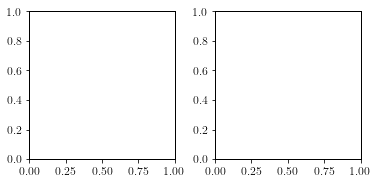

In [ ]:
def plot_emission_quality(*args):
    n_sims = len(args)
    fig,axs = plt.subplots(1,2,figsize=(2*size,size))

    
    for i in range(0,n_sims):
        color = color_list[i]
        df_2 = args[i]["df_2"]
        
        theory_quality = args[i]["theory_values"]["quality"]
        theory_emission = args[i]["theory_values"]["emission"]
        theory_bimodal_fraction = args[i]["theory_values"]["bimodal_fraction"]
        for j in range(0,len(df_2)):
            marker = marker_list[j]            
            bimodal_fraction = args[i]["data_values"]["bimodal_fraction"][j]
            emission = args[i]["data_values"]["emission"][j]
            quality = args[i]["data_values"]["quality"][j]
            print(len(bimodal_fraction))

            axs[0].plot(bimodal_fraction,emission,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs[0].plot(theory_bimodal_fraction,theory_emission,ls='dashed',c=color,linewidth=1)
            axs[0].set_xlabel(r"$F(d_{c})$")
            axs[0].set_ylabel(r"$\mathcal{E}$")
            axs[0].grid(visible=True)
            axs[0].set_title(r"$\textbf{(a)}$",x=0.08,y=0.89)
            axs[0].set_yscale('log')
            axs[0].set_ylim(0.1,10)

            axs[1].plot(bimodal_fraction,quality,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.0,markeredgewidth=0.5,alpha=alpha)
            axs[1].plot(theory_bimodal_fraction,theory_quality,ls='dashed',c='black',linewidth=1)
            axs[1].set_xlabel(r"$F(d_{c})$")
            axs[1].set_ylabel(r"$\mathcal{Q}$")
            axs[1].grid(visible=True)
            axs[1].set_title(r"$\textbf{(b)}$",x=0.08,y=0.89)
            #axs[1].set_yscale('log')
            axs[1].set_ylim(0,1.0)
            
            
    plt.tight_layout()
    plt.savefig('figures/emission_quality.pdf')
    
plot_emission_quality(output_100K_20L_20l,output_10K_20L_20l,output_1K_20L_20l)

## Paretos

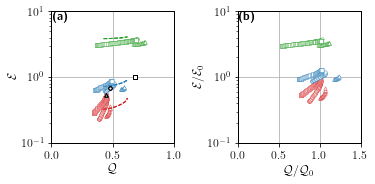

In [16]:
def plot_paretos(*args):
    
    n_sims = len(args)
    fig,axs = plt.subplots(1,2,figsize=(2*size,size))
    
    for i in range(0,n_sims):
        for j in range(0,len(args[i]["df_2"])):
            pareto_quality = args[i]["data_values"]["pareto_quality"][j]
            pareto_emission = args[i]["data_values"]["pareto_emission"][j]
            quality_unimodal = args[i]["data_values"]["quality_unimodal"]
            emission_unimodal = args[i]["data_values"]["emission_unimodal"]
            
            pareto_quality_0 = pareto_quality/quality_unimodal
            pareto_emission_0 = pareto_emission/emission_unimodal
            
            theory_pareto_quality = args[i]["theory_values"]["pareto_quality"]
            theory_pareto_emission = args[i]["theory_values"]["pareto_emission"]
            
            marker = marker_list[j]
            color = color_list[i]
            marker_uni = marker_list[i]
            axs[0].plot(pareto_quality,pareto_emission,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs[0].plot(theory_pareto_quality,theory_pareto_emission,linestyle='dashed',c=color,linewidth=1)
            axs[0].scatter(quality_unimodal,emission_unimodal,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            axs[0].set_xlabel(r"$\mathcal{Q}$")
            axs[0].set_ylabel(r"$\mathcal{E}$")
            axs[0].set_title(r"$\textbf{(a)}$",x=0.08,y=0.89)
            axs[0].grid(visible=True)
            axs[0].set_yscale('log')
            axs[0].set_ylim(0.1,10)
            axs[0].set_xlim(0,1.0)
            
            axs[1].plot(pareto_quality_0,pareto_emission_0,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs[1].set_xlabel(r"$\mathcal{Q}/\mathcal{Q}_{0}$")
            axs[1].set_ylabel(r"$\mathcal{E}/\mathcal{E}_{0}$")
            axs[1].set_title(r"$\textbf{(b)}$",x=0.08,y=0.89)
            axs[1].grid(visible=True)
            axs[1].set_yscale('log')
            axs[1].set_ylim(0.1,10)
            axs[1].set_xlim(0,1.50)
            
    plt.tight_layout()            
    plt.savefig('figures/paretos.pdf')
plot_paretos(output_100K_20L_20l,output_10K_20L_20l,output_1K_20L_20l)   
            

### DRT parameters

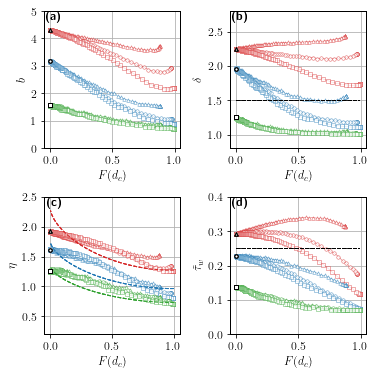

In [17]:
def plot_Drt_params(*args):
    
    n_sims = len(args)
    fig,axs = plt.subplots(2,2,figsize=(2*size,2*size))
    
    for i in range(0,n_sims):
        theory_eta = args[i]["theory_values"]["eta"]
        theory_bimodal_fraction = args[i]["theory_values"]["bimodal_fraction"]
        for j in range(0,len(args[i]["df_2"])):
            bimodal_fraction = args[i]["data_values"]["bimodal_fraction"][j]
            drt_occupancy_bi = args[i]["drt_stats"]["drt_occupancy_bi"][j]
            drt_detour_bi = args[i]["drt_stats"]["drt_detour_bi"][j]
            drt_efficiency_bi = args[i]["drt_stats"]["drt_efficiency_bi"][j]
            drt_waiting_time_bi = args[i]["drt_stats"]["drt_waiting_time_bi"][j]
            drt_occupancy_uni = args[i]["drt_stats"]["drt_occupancy_uni"]
            drt_detour_uni = args[i]["drt_stats"]["drt_detour_uni"]
            drt_efficiency_uni = args[i]["drt_stats"]["drt_efficiency_uni"]
            drt_waiting_time_uni = args[i]["drt_stats"]["drt_waiting_time_uni"]
            
            marker = marker_list[j]
            color = color_list[i]
            marker_uni = marker_list[i]
            
            axs[0][0].plot(bimodal_fraction,drt_occupancy_bi,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs[0][0].scatter(0,drt_occupancy_uni,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            #axs[0][0].axhline(y=1.5,xmin=0.05,xmax=0.95,c='black',ls='dashed',lw=1)
            axs[0][0].grid(visible=True)
            axs[0][0].set_xlabel(r"$F(d_{c})$")
            axs[0][0].set_ylabel(r"$b$")
            axs[0][0].set_title(r"$\textbf{(a)}$",x=0.08,y=0.89)
            axs[0][0].set_ylim(0,5)
            
            axs[0][1].plot(bimodal_fraction,drt_detour_bi,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs[0][1].scatter(0,drt_detour_uni,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            axs[0][1].axhline(y=1.5,xmin=0.05,xmax=0.95,c='black',ls='dashed',lw=1)
            axs[0][1].grid(visible=True)
            axs[0][1].set_xlabel(r"$F(d_{c})$")
            axs[0][1].set_ylabel(r"$\delta$")
            axs[0][1].set_title(r"$\textbf{(b)}$",x=0.08,y=0.89)
            axs[0][1].set_ylim(0.8,2.8)
            
            axs[1][0].plot(bimodal_fraction,drt_efficiency_bi,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs[1][0].scatter(0,drt_efficiency_uni,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            axs[1][0].plot(theory_bimodal_fraction,theory_eta,ls='dashed',c=color,lw=1)
            axs[1][0].grid(visible=True)
            axs[1][0].set_xlabel(r"$F(d_{c})$")
            axs[1][0].set_ylabel(r"$\eta$")
            axs[1][0].set_title(r"$\textbf{(c)}$",x=0.08,y=0.89)
            axs[1][0].set_ylim(0.20,2.5)
            
            axs[1][1].plot(bimodal_fraction,drt_waiting_time_bi,marker,mfc='white',linestyle='solid',c=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs[1][1].scatter(0,drt_waiting_time_uni,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            axs[1][1].axhline(y=0.25,xmin=0.05,xmax=0.95,c='black',ls='dashed',lw=1)
            axs[1][1].grid(visible=True)
            axs[1][1].set_xlabel(r"$F(d_{c})$")
            axs[1][1].set_ylabel(r"$\tilde{\tau}_{w}$")
            axs[1][1].set_title(r"$\textbf{(d)}$",x=0.08,y=0.89)
            axs[1][1].set_ylim(0.0,0.4)
            
    plt.tight_layout()
    plt.savefig('figures/drt_stats.pdf')
    
plot_Drt_params(output_100K_20L_20l,output_10K_20L_20l,output_1K_20L_20l)

### Traffic

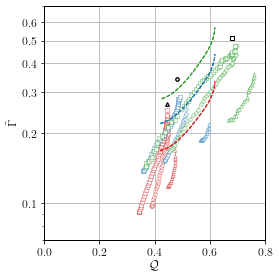

In [18]:
y_ticks = [0.1,0.2,0.3,0.4,0.5,0.6]

def plot_traffic(*args):
    n_sims = len(args)
    fig,axs =plt.subplots(1,1,figsize=(1.5*size,1.5*size))
    
    for i in range(0,n_sims):
        for j in range(0,len(args[i]["df_2"])):
            
            data_pareto_quality = args[i]["data_values"]["pareto_quality"][j]
            data_pareto_rel_traffic = args[i]["data_values"]["pareto_rel_traffic"][j]
            data_unimodal_quality = args[i]["data_values"]["quality_unimodal"]
            data_unimodal_rel_traffic = args[i]["data_values"]["rel_uni_traffic"]
            
            theory_pareto_quality = args[i]["theory_values"]["pareto_quality"]
            theory_pareto_rel_traffic = args[i]["theory_values"]["pareto_rel_traffic"]
            
            marker = marker_list[j]
            color = color_list[i]
            marker_uni = marker_list[i]
            
            axs.plot(data_pareto_quality,data_pareto_rel_traffic,marker,mfc='white',linestyle='solid',color=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs.plot(theory_pareto_quality,theory_pareto_rel_traffic,linestyle='dashed',color=color,lw=1,zorder=10)
            axs.scatter(data_unimodal_quality,data_unimodal_rel_traffic,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            axs.grid(visible=True)
            axs.set_xlabel(r"$\mathcal{Q}$")
            axs.set_ylabel(r"$\tilde{\Gamma}$")
            axs.set_yscale('log')
            axs.set_ylim(0.07,0.7)
            axs.set_xlim(0.0,0.8)
            
            axs.yaxis.set_major_formatter(NullFormatter())
            axs.yaxis.set_minor_formatter(NullFormatter())
            axs.set_yticks(y_ticks)
            axs.set_yticklabels(y_ticks)
            
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False) 
    formatter.set_powerlimits((-1,1)) 
    axs.yaxis.set_major_formatter(formatter)
            
    plt.tight_layout()
    plt.savefig("figures/traffic.pdf")
    
plot_traffic(output_100K_20L_20l,output_10K_20L_20l,output_1K_20L_20l)

### Dshuttle

[0.1, 0.2, 0.3, 0.4, 0.6, 1.0]


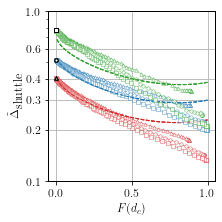

In [20]:



y_ticks = [0.1,0.2,0.3,0.4,0.6,1.0]


def plot_Dshuttle(*args):
    n_sims = len(args)
    fig,axs = plt.subplots(1,1,figsize=(1.2*size,1.2*size))
    
    print(y_ticks)
    
    for i in range(0,n_sims):
        color = color_list[i]
        marker_uni = marker_list[i]
        
        theory_bimodal_fraction = args[i]["theory_values"]["bimodal_fraction"]
        theory_Delta_shuttle = args[i]["theory_values"]["Delta_shuttle"]
        df_2 = args[i]["df_2"]
        drt_stats = args[i]["drt_stats"]
        data_values = args[i]["data_values"]
        uni_dict = args[i]["uni_dict"]
        
        drt_driven_distance_uni = drt_stats["drt_driven_distance_uni"]
        drt_efficiency_uni = drt_stats["drt_efficiency_uni"]
        
        
        for j in range(0,len(df_2)):
            marker = marker_list[j]
            
            drt_driven_distance_bi = drt_stats["drt_driven_distance_bi"][j]
            car_driven_distance_bi = drt_stats["car_driven_distance_bi"][j]
            drt_efficiency_bi = drt_stats["drt_efficiency_bi"][j]                       
            bimodal_fraction = data_values["bimodal_fraction"][j]
            
            car_driven_distance_bi /= drt_efficiency_uni
            #drt_driven_distance_bi += car_driven_distance_bi
                        
            axs.plot(bimodal_fraction,drt_driven_distance_bi,marker,mfc='white',linestyle='solid',color=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            axs.scatter(0,drt_driven_distance_uni,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            axs.plot(theory_bimodal_fraction,theory_Delta_shuttle,ls='dashed',c=color,lw=1)
            axs.set_xlabel(r"$F(d_{c})$")
            axs.set_ylabel(r"$\tilde{\Delta}_\textrm{shuttle}$")
            #axs.set_ylim(0.1,1.0)
            axs.set_yscale('log')
            axs.grid(visible=True)
            
            axs.yaxis.set_major_formatter(NullFormatter())
            axs.yaxis.set_minor_formatter(NullFormatter())
            axs.set_yticks(y_ticks)
            axs.set_yticklabels(y_ticks)
            
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    axs.yaxis.set_major_formatter(formatter)
            
    plt.tight_layout()
    plt.savefig("figures/D_shuttle.pdf")
            
plot_Dshuttle(output_100K_20L_20l,output_10K_20L_20l,output_1K_20L_20l)

## Serviced fraction

In [ ]:
def get_serviced_frac(*args):
    n_sims = len(args)
    fig,axs = plt.subplots(1,1,figsize=(size,size))
    
    for i in range(0,n_sims):
        color = color_list[i]
        marker_uni = marker_list[i]
        
        df_2 = args[i]["df_2"]
        data_values = args[i]["data_values"]
        
        for j in range(0,len(df_2)):
            marker = marker_list[j]
            
            bimodal_fraction = data_values["bimodal_fraction"][j]
            p_served = data_values["p_served"][j]
            
            axs.plot(bimodal_fraction,p_served,marker,mfc='white',linestyle='solid',color=color,markersize=markersize,lw=0.5,markeredgewidth=0.5,alpha=alpha)
            #axs.scatter(0,drt_driven_distance_uni,color='black',s=10,zorder=10,marker=marker_uni,facecolor='white')
            #axs.plot(theory_bimodal_fraction,theory_Delta_shuttle,ls='dashed',c=color,lw=1)
            axs.set_xlabel(r"$F(d_{c})$")
            axs.set_ylabel(r"$p_\textrm{served}$")
            axs.set_ylim(0,1.1)
            #axs.set_yscale('log')
            axs.grid(visible=True)
            
    plt.tight_layout()
    plt.savefig('figures/serviced_frac.pdf')
    plt.show()
    
get_serviced_frac(output_1K_20L_20l)
        

### Train Statistics

In [ ]:
def get_Pt_Stats(df_2,uni_dict,car_dict):
    tt_car = car_dict["tt_car"]
    print(tt_car)
    pt_waiting_time = np.array([np.array(df_2["pt_wait_times"].values[i]) for i in range(len(df_2))])
    pt_occupancy = df_2["av_pt_occs"]
    pt_waiting_time /= tt_car
    return pt_occupancy,pt_waiting_time

pt_occupancy_p,pt_waiting_time_p = get_Pt_Stats(df_2_p,uni_dict_p,car_dict_p)
pt_occupancy_ap,pt_waiting_time_ap = get_Pt_Stats(df_2_ap,uni_dict_ap,car_dict_ap)

fig,axs = plt.subplots(1,2,figsize=(2*size,size))
for i in range(0,len(df_2_ap)):
    axs[0].plot(x_rescaled_p[i],pt_occupancy_p[i],marker_list[i],mfc='white',linestyle='dashed',c=color_list[i],markersize=2,lw=0.5)
    axs[0].plot(x_rescaled_ap[i],pt_occupancy_ap[i],marker_list[i],mfc='white',linestyle='solid',c=color_list[i],markersize=2,lw=0.5)
    axs[0].set_xlabel(r"$F(d_{c})$")
    axs[0].set_ylabel(r"$b$")
    axs[0].grid(visible=True)
    
    axs[1].plot(x_rescaled_p[i],pt_waiting_time_p[i],marker_list[i],mfc='white',linestyle='dashed',c=color_list[i],markersize=2,lw=0.5)
    axs[1].plot(x_rescaled_ap[i],pt_waiting_time_ap[i],marker_list[i],mfc='white',linestyle='solid',c=color_list[i],markersize=2,lw=0.5)
    axs[1].set_xlabel(r"$F(d_{c})$")
    axs[1].set_ylabel(r"$\tau_{w}$")
    axs[1].grid(visible=True)
    
plt.tight_layout()
#plt.savefig(path_figures+"pt_stats.pdf")
    

### Individual user Statistics

In [ ]:
fig,axs = plt.subplots()


for i in range(0,len(label)):
    axs.plot(x_rescaled[i],quality_data[i],marker_list[i], label=r"$\Theta=%d$"%(20/label[i] - 1),mfc='none',linestyle='solid')
#axs.plot(D_CUT,quality_theory,'-o',label='theory')
#plt.legend()
plt.ylabel(r"$\mathcal{E}$")
plt.xlabel(r"$F(d_{c})$")
plt.legend()
plt.grid(visible=True)
plt.title("$\Lambda=%0.2f, \mathcal{N}=10^{5}$"%E)
plt.tight_layout()
plt.savefig(path_figures+"periodic_quality.pdf")
plt.show()


In [ ]:
fig,axs = plt.subplots()
waiting_time_drt = np.array([np.array(df_2["pt_wait_times"].values[i]) for i in range(len(df_2["dcut"]))])/(mean_req_dist/(30/3.6))
drt_detour = np.array([np.array(df_2["av_detours"].values[i]) for i in range(len(df_2["dcut"]))])
drt_occupancy =  np.array([np.array(df_2["av_drt_occs_non_standing"].values[i]) for i in range(len(df_2["dcut"]))])
for i in range(0,len(label)):
    axs.plot(x_rescaled[i],waiting_time_drt[i],'-o', label=20/label[i] - 1)
    axs.set_ylabel(r"$\tilde{\tau}_{w}$")
    axs.set_xlabel(r"$\tilde{d}_{c}$")
plt.legend()
plt.grid(visible=True)

In [ ]:
print(mean_req_dist)

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(size,size))

for i in range(0,len(label)):    
    pareto_data = func.getParetoFront(quality_data[i],emission_data[i])
    pareto_quality_data = quality_data[i][pareto_data]
    pareto_emission_data = emission_data[i][pareto_data]
    pareto_traffic_data = rel_traffic[i][pareto_data]
    pareto_serviced_frac_data = p_served[i][pareto_data]
    
    axs.plot(pareto_quality_data, pareto_emission_data,'-o', label=20/label[i] - 1)
    axs.set_xlabel(r"$\mathcal{Q}$")
    axs.set_ylabel(r"$\mathcal{E}$")
    axs.set_yscale('linear')
    #axs[1].plot(pareto_quality_data, pareto_serviced_frac_data)
    axs.set_title(r"$\Lambda$=%0.2f, $\mathcal{N}=10^{5}$"%(E))

axs.plot(pareto_front_quality_theory,pareto_front_emission_theory, label='theory',lw=3)
axs.scatter(quality_data_unimodal, emissions_data_unimodal, label='uni-data',s=100, marker = "v", color='brown', zorder = 99)
#axs[0].legend()
#axs[1].legend()
axs.grid(visible=True)
plt.tight_layout()
plt.savefig(path_figures+reqs+"pareto.pdf")
plt.show()

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(size,size))

for i in range(0,len(label)):    
    pareto_data = func.getParetoFront(quality_data[i],emission_data[i])
    pareto_quality_data = quality_data[i][pareto_data]
    pareto_emission_data = emission_data[i][pareto_data]
    pareto_traffic_data = rel_traffic[i][pareto_data]
    pareto_serviced_frac_data = p_served[i][pareto_data]
    
    axs.plot(pareto_quality_data, pareto_traffic_data,'-o', label=20/label[i] - 1)
    axs.set_xlabel(r"$\mathcal{Q}$")
    axs.set_ylabel(r"$\tilde{\Gamma}$")
    axs.set_yscale('linear')
    #axs[1].plot(pareto_quality_data, pareto_serviced_frac_data)
    axs.set_title(r"$\Lambda$=%0.2f, $\mathcal{N}=10^{5}$"%(E))

axs.plot(pareto_front_quality_theory,pareto_front_traffic_theory, label='theory',lw=3)
axs.scatter(quality_data_unimodal, rel_uni_traffic, label='uni-data',s=100, marker = "v", color='brown', zorder = 99)
#axs[0].legend()
#axs[1].legend()
axs.grid(visible=True)
plt.tight_layout()
plt.savefig(path_figures+reqs+"traffic.pdf")
plt.show()

### Theory Paretos

In [ ]:
#Compute Paretos

fig,axs = plt.subplots(1,2,figsize=(2*size,size))
params = {
    'backend': 'ps',
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'axes.linewidth': 1.0,
    'figure.figsize': (246.09686/72.27, 246.09686/72.27),
    'axes.titlesize': 12,
}
plt.rcParams.update(params)
for i in range(0,len(label)):    
    pareto_data = func.getParetoFront(quality_data[i],emission_data[i])
    pareto_quality_data = quality_data[i][pareto_data]
    pareto_emission_data = emission_data[i][pareto_data]
    pareto_traffic_data = rel_traffic[i][pareto_data]
    pareto_serviced_frac_data = p_served[i][pareto_data]
    
    axs[0].plot(pareto_quality_data, pareto_emission_data,'-o', label=20/label[i] - 1)
    axs[0].set_xlabel(r"$\mathcal{Q}$")
    axs[0].set_ylabel(r"$\mathcal{E}$")
    axs[1].plot(pareto_quality_data, pareto_traffic_data, '-o', label=20/label[i] - 1)
    axs[1].set_yscale('linear')
    #axs[1].plot(pareto_quality_data, pareto_serviced_frac_data)
    axs[1].set_xlabel(r"$\mathcal{Q}$")
    axs[1].set_ylabel(r"$\tilde{\Gamma}$")
    axs[0].set_title(r"$\Lambda$=%0.2f,$\mathcal{N}$=%s"%(E,reqs))
    axs[1].set_title(r"$\Lambda$=%0.2f,$\mathcal{N}$=%s"%(E,reqs))

axs[0].plot(pareto_front_quality_theory,pareto_front_emission_theory, label='theory',lw=3)
axs[1].plot(pareto_front_quality_theory,pareto_front_traffic_theory,label='theory',lw=3)
axs[0].scatter(quality_data_unimodal, emissions_data_unimodal, label='uni-data',s=100, marker = "v", color='brown', zorder = 99)
axs[1].scatter(quality_data_unimodal, rel_uni_traffic, label = 'uni-data', s=100, marker="v",color='brown', zorder = 99)
#axs[0].legend()
#axs[1].legend()
axs[0].grid(visible=True)
axs[1].grid(visible=True)
plt.tight_layout()
plt.savefig(path_figures+reqs+"pareto_traffic.pdf")
plt.show()

In [ ]:
fig,axs = plt.subplots()
detour = np.array([np.array(df_2["av_detours"].values[i]) for i in range(len(df_2["dcut"]))])
occupancy = np.array([np.array(df_2["av_drt_occs_non_standing"].values[i]) for i in range(len(df_2["dcut"]))])
efficiency = occupancy/detour

for i in range(0,len(detour)):
    axs.plot(df_2["dcut"].values[i],efficiency[i],'-o',label=20/label[i] - 1)
axs.plot(D_CUT[1:],eta_theory[1:],label='theory',lw=3)
axs.set_xlabel(r"$\tilde{d}_c$")
axs.set_ylabel(r"$\eta$")
axs.grid(visible=True)
axs.set_title(r"$\Lambda$=%0.2f,$\mathcal{N}$=%s"%(E,reqs))
plt.legend()

In [ ]:
fig, axes = plt.subplots(2,1,constrained_layout=True, figsize=(6.4, 4.4))

# fig, ax = plt.subplots(constrained_layout=True)
ax = axes[0]

df["dcut_rounded"] = np.round(df["dcut"], 1)
df["l_rounded"] = np.round(df["l"], 1)

# bi_or_unimodal.set_index(round(1/bi_or_unimodal.reset_index()["index"]), inplace=True)
# bi_or_unimodal.set_index(np.round(x_rescaled, decimals=2), inplace=True)
# bi_or_unimodal = df.loc[:,["pt_usage_count", "non_pt_usage_count"]]
# bi_or_unimodal.plot.bar(ax = ax, xlabel=xlabel, ylabel="frequency")
n_passenger = df["pt_usage_count"] + df["non_pt_usage_count"]
df["pt_usage_frac"] = df["pt_usage_count"]/n_passenger
df["non_pt_usage_frac"] = df["non_pt_usage_count"]/n_passenger
df.plot.bar(ax = ax, x="dcut_rounded", y=["pt_usage_frac", "non_pt_usage_frac"], xlabel=r"$\ell$", ylabel="Relative number\nof passengers", stacked=True, legend=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.set_title("Travel Mode Share")
ax.text(0.0, 1.05, "(a)", transform=ax.transAxes, fontsize="large")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
patches, labels = ax.get_legend_handles_labels()
labels = ["Bimodal", "Unimodal"]
ax.legend(patches, labels, frameon=False, bbox_to_anchor=(1.0, 1))
# ax.grid(axis="y")

# fig, ax = plt.subplots(constrained_layout=True)
ax = axes[1]

# bi_or_unimodal.set_index(round(1/bi_or_unimodal.reset_index()["index"]), inplace=True)
# drt_pt_person_km.set_index(np.round(x_rescaled, decimals=2), inplace=True)
# df.plot.bar(ax = ax, x="dcut_rounded", y=["cummulative_drt_bimodal", "cummulative_train_bimodal"], xlabel=r"$d_\mathrm{cut}$", ylabel="meter travelled")
df["pkm_drt_norm"] = df["pkm_drt"]*1000 / dists_car.sum()
df["pkm_pt_norm"] = df["pkm_pt"]*1000 / dists_car.sum()
df.plot.bar(ax = ax, x="dcut_rounded", y=["pkm_pt_norm", "pkm_drt_norm"], xlabel=r"$\ell$", ylabel="Distance travelled\n(cum. car pkm)", stacked=True, legend=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.text(0.0, 1.05, "(b)", transform=ax.transAxes, fontsize="large")


patches, labels = ax.get_legend_handles_labels()
labels = ["PT", "DRT"]
ax.legend(patches, labels, frameon=False, bbox_to_anchor=(1.0, 1))
# labels=["PT", "DRT"]
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,0.), ncol=2, frameon=False)
# ax.legend()

ax.set_title("Passenger Distance Travelled")
# ax.grid(axis="y")

# fig.savefig("Figures/BarPlotsPtDrt.pgf", bbox_inches="tight")
plt.show()

In [ ]:
fig, axs = plt.subplots()

# def getWaitTimes(mu_s, link_tt, bi_uni_share, p_drt):
#     notp_d = 1-p_d
#     ptwait = 1/mu_s
#     drtwait = link_tt*sum([i*notp_d**(2*i*(i+1)) for i in range(1,100)])
#     twaits = bi_uni_share['Bimodal'] * (ptwait + 2*drtwait) + bi_uni_share['Unimodal'] * drtwait
#     return twaits, drtwait, ptwait
    
# bi_uni_share = bi_or_unimodal.divide(bi_or_unimodal.sum(axis=1), axis=0)
# mu_s = mu/(24*3600)
# link_tt = 200/(30/3.6)
# p_d = 300/10000
# totalwait, drtwait, ptwait = getWaitTimes(mu_s, link_tt, bi_uni_share, p_d)
t_w = np.array([np.array(df_2["wait_times"].values[i]) for i in range(len(df_2["dcut"]))])

for i in range(0,len(label)):
    axs.plot(x_rescaled[i], t_w[i]/tt_car, 'o-', label=20/label[i] - 1)
    axs.set_xlabel(r"$d_c$")
    axs.set_ylabel(r"$\tilde{\tau}_w$")
plt.legend()
plt.grid(visible=True)
plt.title("$\mathcal{N}$=%s"%reqs)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_rescaled, df["wait_times_served_only"]/tt_car, 'o-', label="Average (only served) waiting time (s)")
# ax.plot(x_rescaled, totalwait, 'o--')
ax.set_ylabel("t (s)")
ax.set_xlabel(xlabel)
#ax.set_ylim((0,df["wait_times"].max()*1.1))
ax.grid()
ax.legend()


In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

# test = (av_drt_occs - av_drt_occs.min()) /(av_drt_occs.max() - av_drt_occs.min())
def getWaitingTimeApprox(ell, dcut, detours):
    dcut_ = dcut * mean_req_dist/10000
    ell_ = ell * mean_req_dist/10000
    d_bi = bimFrac(dcut_)/4*detours*beta*ell_
    d_uni = detours/3*uniFracAvDist(dcut_)
    tw = (d_bi+d_uni)/v_drt*3600
    return tw

# print(test)
print(x_rescaled[np.argmax(df["drt_wait_times"].to_numpy())])
ax.plot(x_rescaled, df["drt_wait_times"]/tt_car, '-o', label='Total')
# ax.plot(x_rescaled, (df["drt_wait_times"]+df["drt_wait_times_std"])/tt_car, '-o', label='Test')
ax.plot(x_rescaled, df["wait_times_drt_unimodal_legs"]/tt_car, 'o-', label="Unimodal legs")
ax.plot(x_rescaled, df["wait_times_drt_bimodal_legs"]/tt_car, 'o--', label="Bimodal legs")
ax.plot(x_rescaled, 2*df["wait_times_drt_unimodal_legs"]/tt_car, ':', label="2 $\cdot$ unimodal legs")

# ax.plot(x_rescaled, df["av_drt_occs_non_empty"]*rt_bimodal/2, 'o:', label="Test")
# ax.plot(x_rescaled, df["av_drt_occs_non_standing"]*drt_rt*1/2, 'o:', label="Prediction")
# ax.plot(x_rescaled, av_drt_occs_non_standing*ride_times_drt_unimodal_legs*1/2, 'o:', label="Test")
# ax.plot(x_rescaled, getWaitingTimeApprox(df["l"].to_numpy(),
#                                          df["dcut"].to_numpy(),
#                                          df["av_detours"].to_numpy())/tt_car, 'o:', label="Prediction")

# ax.plot(x_rescaled, [drtwait for _ in x], '--o')
ax.set_ylabel(r"$\tau_w$")
ax.set_xlabel(xlabel)
ax.set_ylim(0,None)
ax.legend(loc='lower right')
ax.grid()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# if save_figs:
# fig.savefig("Figures/DrtWaitingTimeCompBimodal.pgf")
# fig.savefig("Figures/DrtWaitingTimeCompBimodalManhattan.pgf")
# fig.savefig("Figures/DrtWaitingTimeCompBimodalBerlin.pgf")

plt.show()

In [ ]:
fig, ax = plt.subplots()

# test = (av_drt_occs - av_drt_occs.min()) /(av_drt_occs.max() - av_drt_occs.min())
# print(test)
ptwait = 1/(mu/3600)
# Pt wait times are only averaged over people who use pt so wait_times != pt_wait_times + drt_wait_times
ptwait_sim_norm = df["pt_wait_times"]/tt_car
ax.plot(x_rescaled, ptwait_sim_norm, '-o', label='Average Waiting Time PT')
ax.plot(x_rescaled, [ptwait for _ in x]/tt_car, '--o', label=r'$1/\mu$')
ax.set_ylabel("t (s)")
ax.set_xlabel(xlabel)
ax.set_ylim(0,ptwait_sim_norm.max()*1.1)
ax.legend()
ax.grid()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

if save_figs:
    fig.savefig("PtWaitingTime.png", dpi=200)

plt.show()

In [ ]:
fig, ax = plt.subplots()

occupancy_theory = np.vectorize(getDrtNonIdlingOccupancy)(x, x, v_drt, 2500, df["av_detours"])

ax.plot(x_rescaled, df["av_drt_occs"], 'o-', label="Simulation")
ax.plot(x_rescaled, occupancy_theory, 'o--', label="Theory")
ax.set_ylabel(r"$\langle b\rangle$")
ax.set_xlabel(xlabel)
ax.set_ylim(0,None)
ax.grid()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Drt Occupancy")
ax.legend()

if save_figs:
    fig.savefig("AverageOccupancy.png", dpi=200)
# fig.savefig("Figures/AverageDrtOccupancy.pgf")
plt.show()

In [ ]:
fig, ax = plt.subplots()
#TODO fix this

ax.plot(x_rescaled, df["av_drt_occs_non_empty"], 'o-')
ax.set_ylabel(r"$\langle b_\mathrm{drt}^*\rangle$")
ax.set_xlabel(xlabel)
ax.grid()

if save_figs:
    fig.savefig("AverageNonEmptyOccupancy.png", dpi=200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_rescaled, df["av_drt_occs_non_standing"], 'o-')
ax.set_ylabel(r"$\langle b_\mathrm{drt}\rangle$")
ax.set_xlabel(xlabel)
ax.grid()

if save_figs:
    fig.savefig("AverageNonStandingOccupancy.png", dpi=200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Difference to theory for InvGamma comes from periodic BC

ax.plot(x_rescaled, df["av_pt_occs"], 'o-', label="Simulation")

# ax.plot(ell_list, tram_occs_theory[:,1], "o--", c='r', label="Theory computed by"+r" $\langle n\rangle$")
# ax.plot(ell_list, tram_occs_theory[:,0], "o--", c='g', label="Theory computed by"+r" $\tilde{I}$")
#ax.plot(x_rescaled, tram_occs_theory[:,1], "o--", label="Theory")
ax.legend()
ax.grid()

ax.set_ylabel(r"$\langle b_\mathrm{pt}\rangle$")
ax.set_xlabel(xlabel)
ax.set_xlim(0,None)
ax.set_ylim(0,None)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("PT Occupancy")

if save_figs:
    fig.savefig("AveragePtOccupancy.png", dpi=200)
# fig.savefig("Figures/AveragePtOccupancy.pgf")
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_rescaled, df["av_detours"], 'o-')
ax.set_ylabel(r"$\langle \delta\rangle$")
ax.set_xlabel(xlabel)

ax.set_ylim((0,df["av_detours"].max()*1.1))
ax.grid()

save_figs=True
if save_figs:
    fig.savefig("AverageDrtDetour.png", dpi=200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_rescaled, df["av_drt_occs_non_empty"]/df["av_detours"], 'o-')
ax.set_ylabel(r"$\langle b^*\rangle/\langle\delta\rangle$")
ax.set_xlabel(xlabel)

ax.set_ylim((0,None))
ax.grid()

if save_figs:
    fig.savefig("BOverDelta.png", dpi=200)
plt.show()

### Theoretical traffic

In [ ]:
#Normalized unimodal traffic is 1/eta

def get_unimodal_traffic(x):
    rt = x**(-func.c)
    return rt

get_unimodal_trafficVectorized = np.vectorize(get_unimodal_traffic)

unimodal_traffic = get_unimodal_trafficVectorized(E)

unimodal_quality = 1/(t_w + 1.5)


In [ ]:
v_drt = 30*5/18
car_traffic = int(reqs)*mean_req_dist/(v_drt*3600)
p_standing = np.array([np.array(df_2["standing_fraction"].values[i]) for i in range(len(df_2["dcut"]))])

fig,axs = plt.subplots()
for i in range(0,len(label)):
    rel_traffic = (1 - p_standing[i])*int(drt)/car_traffic
    axs.plot(x_rescaled[i], rel_traffic, 'o-', label=20/label[i] - 1)
    axs.set_xlabel(r"$\tilde{d}_c$")
    axs.set_ylabel(r"$\tilde{\Gamma}$")
plt.legend()
plt.yscale('log')
plt.grid(visible=True)
plt.title("Reqs=%s"%reqs)
plt.savefig(path_figures+reqs+'traffic.pdf')
plt.show()

In [ ]:
print(output_10K_periodic["params"]["E"],output_10K["params"]["E"],output_30K["params"]["E"],output_100K_20L_high["params"]["E"])

In [ ]:
df["av_drt_occs"].hist()

In [ ]:
print(func.get_dgdcFbi(30)+func.get_dldcFuni(30))